In [1]:
#settings
%pylab inline
import scipy, scipy.stats
pylab.rcParams['figure.figsize'] = (8.0, 4.0)
from __future__ import print_function

Populating the interactive namespace from numpy and matplotlib


## 2.5 Linear Correlation

* So far: discrete variables (nominal)
* Now: continuous variables $\to$ offer additional modes of dependency analysis

** Most simple Measure**: _Linear Correlation Coefficient_ $r$

** Given**: 
* paired random variables $X$, and $Y$ with sample $\{(x_i, y_i)\}_{i=1,\dots, N}$

<img src="images/LinKorrDef.png" width="30%">

* $r$ is defined as: 
$$ r = \frac{\sum\limits_i (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum\limits_i (x_i - \bar{x})^2}\sqrt{\sum\limits_i(y_i - \bar{y})^2}}$$
where $\bar{x}, \bar{y}$ are the sample means of $x$ resp. $y$

### Geometric interpretation as cos(angle between vectors)


$$ r = \cos\left(\angle ( \hat{m}_x, \hat{m}_y)\right)  = 
\frac{\vec{m}_x \cdot \vec{m}_y}{\|\vec{m}_x\| \|\vec{m}_y\|}  =
\hat{m}_x \cdot \hat{m}_y
$$
with $\hat{m}_x, \hat{m}_y =$ vector of deviations of the mean 
$$ \vec{m}_{x} = ((x_1-\bar{x}),\dots,(x_N-\bar{x}))^T $$

Thereby it is:

* perfect correlation:
$$ r=+1 \Leftarrow  \hat{m}_x = \hat{m}_y \Leftarrow  \vec{m}_x, \vec{m}_y~\text{parallel}$$

* perfect negative correlation:
$$ r=-1 \Leftarrow \hat{m}_x = -\hat{m}_y \Leftarrow \vec{m}_x, \vec{m}_y~\text{antiparallel}$$

* no correlation:
$$r=~0 \Leftarrow  \hat{m}_x~\text{perpendicular/orthogonal on}~\hat{m}_y $$


**Attention:** even if $r=0$, the variables $x, y$ can exhibit a _nonlinear_ dependency! 

** Example **:

$\displaystyle x_k = \sin\left(\frac{2\pi}{N}k\right)$ and 
$\displaystyle y_k = \cos\left(\frac{2\pi}{N}k\right)$ for $k = 0,\dots,(N-1)$.

Obviously $\bar{x}=\bar{y} = 0$

But we derive:
$$ r \propto \sum\limits_{k=0}^{N-1} x_k y_k $$
$$ = \sum\limits_{k=0}^{N-1}\sin\left(\frac{2\pi}{N}k\right)\cos\left(\frac{2\pi}{N}k\right)$$
$$ r = \frac{1}{2} \sum\limits_{k=0}^{N-1}\sin\left(\frac{4\pi}{N}k\right) = 0 $$

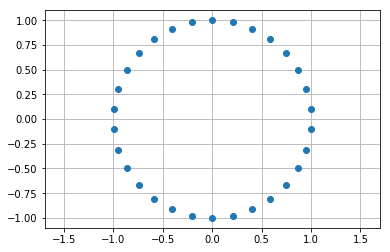

In [12]:
# %pylab inline
N = 30
x = [sin(2*pi/N*k) for k in range(0,N)]
y = [cos(2*pi/N*k) for k in range(0,N)]
plot(x,y,"o")
axis('equal'); grid();

* yet obviously there is a _nonlinear_ dependency $x^2_k + y^2_k =1$!

Geometric Interpretation as Optimization Error 

* Find the best linear description of typ $y(x_i) = f(x) = ax_i+b$
* optimal values (estimators) for $a, b$ are the result of a minimization of 
$$	\chi^2(a,b) := \sum\limits_{i=1}^N (y_i - a x_i -b)^2 $$
w.r.t. the parameters $a$ und $b$. 

<img src="images/LinKorrOpt.png" width="40%">

* Note: as exercise, calculate from $\frac{\partial\chi^2}{\partial a} = 0 $ 
and $\frac{\partial\chi^2}{\partial b} = 0$ 
the optimal values for $a,b$ and the minimal approximation error.}

With best fit parameters $a, b$, it is:  
$$  \chi^2_{\min} = (1-r^2) \sum\limits^N_{i=1}(y_i - \bar{y})^2 $$
* i.e. $(1-r^2)N\cdot \text{Var}(y)$

### 2.5.1. Statistical Interpretation of r

r is a weak statistic: only with restriction, i.e. assumptions on the distribution of the data can we derive statistical statements about the rejectability of the null hypothesis.

** Assumption A1**

Let $x,y$ be normal distributed and $N$ large. Then it is

$$ P(|r|>r_{\text{beob}}) = \text{erfc}\left( \frac{|r_{\text{beob}}|\sqrt{N}}{\sqrt{2}}  \right) $$

* We already know this function since 
$\Gamma(0.5, x^2) = \sqrt{\pi}\text{erfc}(x)$
and $\displaystyle \Gamma(s,x) = \int_x^\infty t^{s-1}e^{-t}dt$.

** Assumption A2**

Under the (often valid) assumption of a two-dimensional Gaussian distribution
$$ p(x,y) \propto \exp\left(-\frac{1}{2}(a_{11}x^2 - 2a_{12}xy + a_{22}y^2)\right) $$
the derived statistic 
$$ t = r \sqrt{\frac{N-2}{1-r^2}} $$
is Student-t-distributed with $N-2$ degrees of freedom (under valid $H_0$).

* Note that $(1-A(\hat{t}, N-2))$ then delivers – analogue to the t-test – the probability of error that the null hypothesis is rejected although true. 